0409

In [ ]:
# Matplotlib 와 pandas 그래프에서 한글 사용 설정
import sys

## 노트북이 코랩에서 실행중인지 체크
if 'google.colab' in sys.modules:
  !echo 'debconf debconf/frontend select Noninterative' | debconf-set-selections
  ## 나눔 폰트 설치
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
    fm.fontManager.addfont(fpath)

  # 나눔바른고딕 폰트 설정
  import matplotlib.pyplot as plt
  plt.rc('font', family='NanumBarunGothic')
  # 마이너스 기호 표시 오류 수정
  import matplotlib
  matplotlib.rcParams['axes.unicode_minus'] = False


## 1. 선형회귀

In [ ]:
# Matplotlib 와 pandas 그래프에서 한글 사용 설정
import sys

## 노트북이 코랩에서 실행중인지 체크
if 'google.colab' in sys.modules:
  !echo 'debconf debconf/frontend select Noninterative' | debconf-set-selections
  ## 나눔 폰트 설치
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
    fm.fontManager.addfont(fpath)

  # 나눔바른고딕 폰트 설정
  import matplotlib.pyplot as plt
  plt.rc('font', family='NanumBarunGothic')
  # 마이너스 기호 표시 오류 수정
  import matplotlib
  matplotlib.rcParams['axes.unicode_minus'] = False


## 1. 정규 방정식

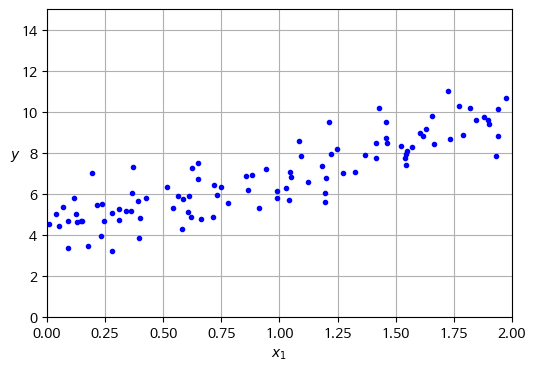

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42) # 동일하게 재현되도록 하기 위해 지정
m = 100 # 샘플 개수
X = 2 * np.random.rand(m,1) # 열 벡터
y = 4 + 3*X + np.random.randn(m,1) # 열 벡터

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [ ]:
# 정규 방정식을 사용해 세타 계산
## 더미 피쳐 추가 : 상수를 추가하지 않더라도 깔끔한 벡터의 연산으로 표기 가능
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # 각 샘플에 x0=1 추가
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# 정규방정식으로 계산한 값 확인
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
# 세타를 사용해 예측하고 그래프 그리기
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new) # 각 샘플에 x0=1 추가
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

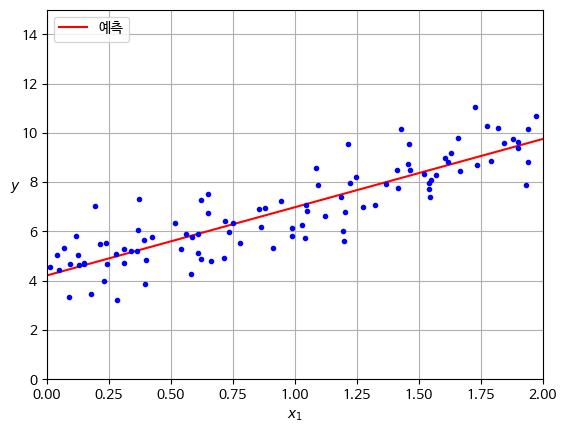

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-', label="예측")
plt.plot(X, y, 'b.')
# 레이블, 축, 그리드, 범례 추가
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [ ]:
# 사이킷런에서 선형회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.21509616] [[2.77011339]]
[[4.21509616]
 [9.75532293]]


In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [ ]:
np.linalg.pinv(X_b)@y

array([[4.21509616],
       [2.77011339]])

## 2. 경사 하강법

### 배치 경사 하강법

### 확률적 경사하강법

In [ ]:
eta = 0.1
n_epochs = 1000 # 훈련세트를 한번 반복하는 것
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1) # 모델 파라미터를 랜덤하게 초기화

for epoch in range(n_epochs):
  gradients = 2/m*X_b.T@(X_b@theta-y)
  theta=theta-eta*gradients

theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
# 학습 스케줄을 사용한 확률적 경사 하강법의 구현
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼 파라미터

def learning_schedule(t):
  return t0/(t+t1)

np.random.seed(42)
theta = np.random.randn(2,1) # 랜덤 초기화

for epoch in range(n_epochs): # 배치경사하강법과 동일한 에폭으로 반복
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T@(xi@theta-yi) # SGD의 경우 m으로 나누지 않음
    eta = learning_schedule(epoch*m+iteration) # 현재 에폭과 이터레이션을 넣어 몇번째 샘플을 처리하는지 확인
    theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

- 스탭이 불규칙하게 진행
- 샘플을 랜덤으로 선택하여 어떤 샘플은 한 에폭에서 여러번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수 있음

In [ ]:
# SGDRegressor 클래스
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, # tol=10^(-5)와 동일한 의미
                       penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # fit()이 ID타깃을 기대하기 때문에 y.ravel()로 씀

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

각각 세타0=4, 세타1=3 으로 잘 예측되었음

### 미니배치 경사하강법
미니배치 경사 하강법(mini-batch gradient descent)
- 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산
- 장점 - 확률적 경사 하강법에 비해 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 성능을 향상

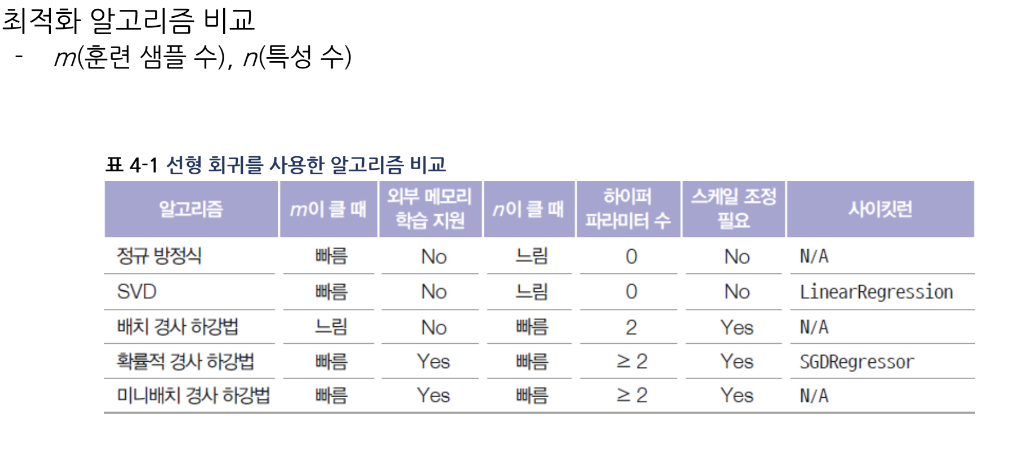


## 3. 다항회귀

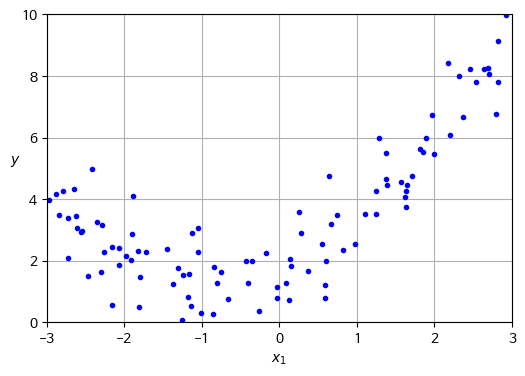

In [ ]:
np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

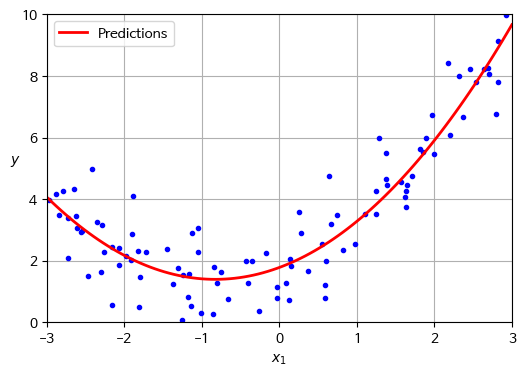

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2,label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

## 4. 학습 곡선

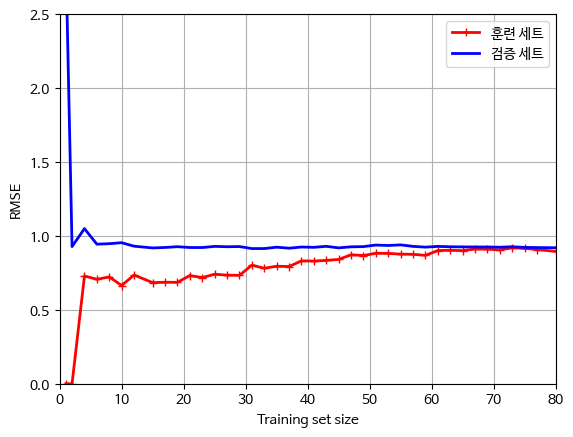

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring='neg_root_mean_squared_error'
    )
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label='훈련 세트')
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label='검증 세트')
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

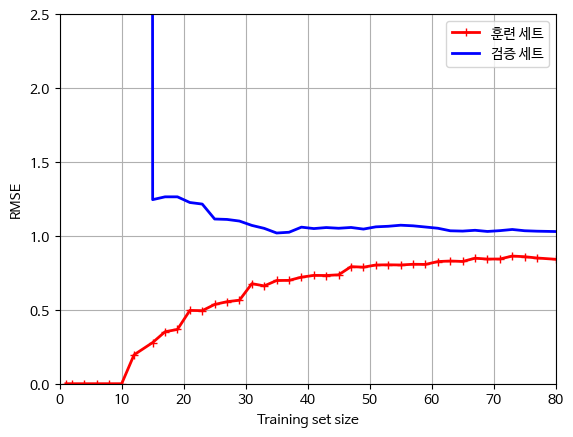

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label='훈련 세트')
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label='검증 세트')
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

## 5. 규제가 있는 선형모델

In [ ]:
# 샘플 선형 데이터셋 생성하기
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

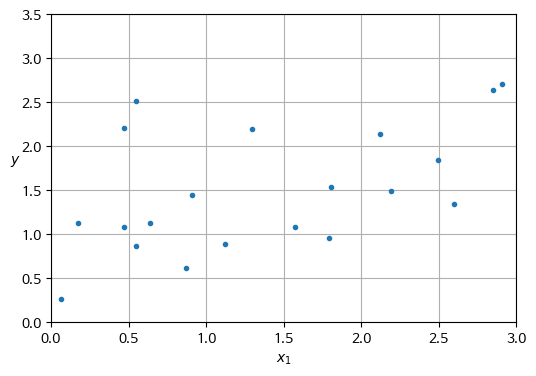

In [ ]:
# 방금 생성한 데이터셋 시각화
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$ ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

### 5.1 릿지 회귀

In [ ]:
# 정규방정식을 사용한 릿지 회귀 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [ ]:
# 확률적 경사하강법
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1/m, tol=None, # 패널티 적용
                       max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X,y.ravel())# fit()은 ID 타깃을 기대하여 y.ravel()로 작성
sgd_reg.predict([[1.5]])

array([1.55302613])

### 5.2 라쏘 회귀

In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### 5.3 엘라스틱 넷

In [ ]:
# 엘라스틱 넷
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

### 5.4 조기 종료

In [ ]:
# 조기 종료
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(
          PolynomialFeatures(degree=90, include_bias=False),
          StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

train_errors, val_errors = [], []

for epoch in range(n_epochs):
  sgd_reg.partial_fit(X_train_prep, y_train)
  y_valid_predict = sgd_reg.predict(X_valid_prep)
  val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
  if val_error < best_valid_rmse:
    best_valid_rmse = val_error
    best_model = deepcopy(sgd_reg)
  # 두 곡선을 얻을 수 있음
  y_train_predict = sgd_reg.predict(X_train_prep)
  train_error = mean_squared_error(y_train, y_train_predict, squared=False)
  val_errors.append(val_error)
  train_errors.append(train_error)

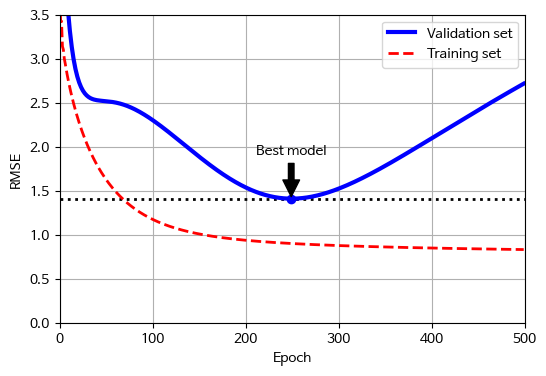

In [ ]:
# 그림 4-20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
xy=(best_epoch, best_valid_rmse),
xytext=(best_epoch, best_valid_rmse + 0.5),
ha="center",
arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

## 6. 로지스틱 회귀

꽃잎의 너비를 기반으로 iris-Versicolor 종을 감지하는 분류기 생성

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 데이터 분할 -> 훈련세트에서 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica' # 이진 분류
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

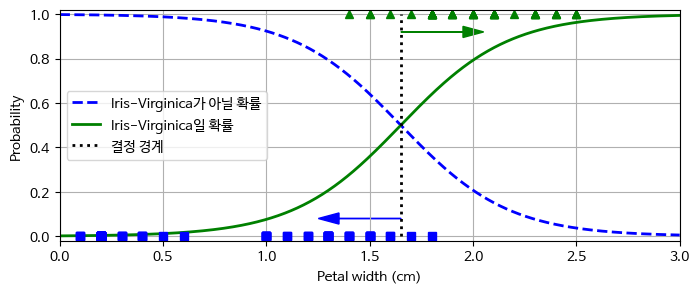

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1) # 열벡터로 변환
y_proba = log_reg.predict_proba(X_new) # 모델의 추정확률 계산
decision_boundary = X_new[y_proba[:,1]>=0.5][0,0]
plt.figure(figsize=(8,3))
plt.plot(X_new, y_proba[:,0],'b--',linewidth=2,
         label='Iris-Virginica가 아닐 확률')
plt.plot(X_new,y_proba[:,1],'g-',linewidth=2,
         label='Iris-Virginica일 확률')
plt.plot([decision_boundary, decision_boundary],[0,1],"k:", linewidth=2,
         label="결정 경계")

# 그리드, 레이블, 축, 범례, 화살표, 샘플 추가
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

In [ ]:
decision_boundary

1.6516516516516517

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

### 소프트맥스

In [ ]:
# 소프트맥스 회귀 사용해 붓꽃을 세개의 클래스로 분류
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])